In [ ]:

# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set plotting style
sns.set(style="whitegrid")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



In [20]:
import os
# Check current working directory
print("Current working directory:", os.getcwd())

# Check files in data folder
print("Files in data folder:", os.listdir('../data')) 

# Load dataset
crypto = pd.read_csv('../data/crypto_prices.csv') 
crypto.head()



Current working directory: /Users/macfreaks/crypto_volatility/notebooks
Files in data folder: ['crypto_prices.csv']


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [14]:
crypto.info() ,crypto.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


(None, (72946, 10))

In [15]:
crypto.describe()  # for numeric columns


,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [23]:
crypto.columns


Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date'],
      dtype='object')

### Data Cleaning

In [ ]:
# Remove unnecessary columns (like Unnamed: 0):

crypto = crypto.drop(columns=['Unnamed: 0'])


In [24]:
crypto.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [25]:
# Convert column types (e.g., date/time):
crypto['timestamp'] = pd.to_datetime(crypto['timestamp'])
crypto['date'] = pd.to_datetime(crypto['date'])


In [29]:
# Check for missing values and duplicates:

crypto.isnull().sum()
crypto.duplicated().sum()

0

##### No missing values found

In [30]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   open         72946 non-null  float64            
 1   high         72946 non-null  float64            
 2   low          72946 non-null  float64            
 3   close        72946 non-null  float64            
 4   volume       72946 non-null  float64            
 5   marketCap    72946 non-null  float64            
 6   timestamp    72946 non-null  datetime64[ns, UTC]
 7   crypto_name  72946 non-null  object             
 8   date         72946 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), object(1)
memory usage: 5.0+ MB


In [34]:
crypto['crypto_name'].value_counts()

crypto_name
Bitcoin                  3248
Litecoin                 3248
XRP                      3157
Dogecoin                 3024
Monero                   2866
Stellar                  2791
Tether                   2582
Ethereum                 2424
Ethereum Classic         2072
Basic Attention Token    1760
EOS                      1730
Bitcoin Cash             1708
BNB                      1706
TRON                     1656
Decentraland             1652
Chainlink                1649
Cardano                  1638
Maker                    1605
Filecoin                 1565
Theta Network            1530
Huobi Token              1513
Ravencoin                1478
Tezos                    1365
VeChain                  1332
Quant                    1325
USD Coin                 1266
Cronos                   1199
Wrapped Bitcoin          1152
Cosmos                   1109
Polygon                  1064
OKB                      1062
UNUS SED LEO             1041
Algorand                 101

In [35]:
crypto['close'].min(), crypto['close'].max()


(8.292e-11, 67566.8300878775)

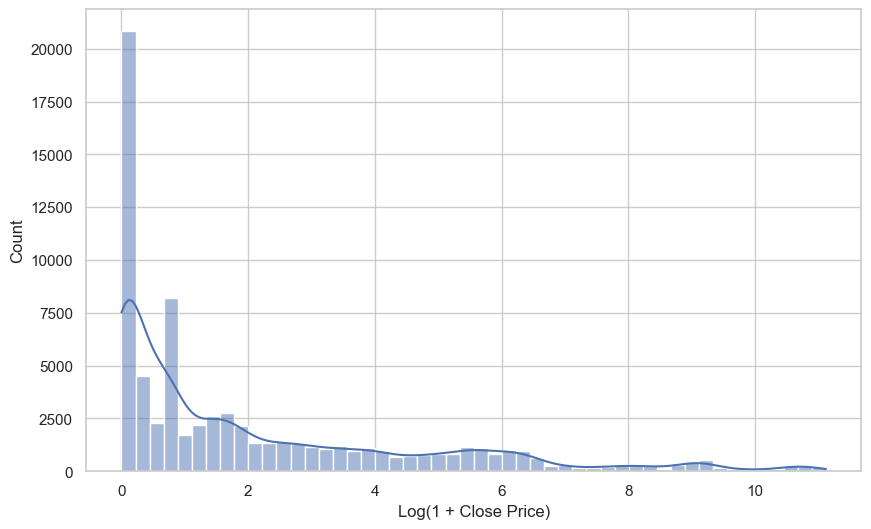

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Use log scale for 'close' because the data range is extremely large 
# (from 8.29e-11 to 67,566). This compresses the values and makes the histogram readable.

plt.figure(figsize=(10,6))
sns.histplot(np.log1p(crypto['close']), bins=50, kde=True)
plt.xlabel('Log(1 + Close Price)')
plt.show()
